In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

df= pd.read_csv('/content/CHATGPT.csv')
df = df.rename(columns={'label': 'Label'})
df

,Review,Label
0,up to this point i ’ ve mostly been using chat...,NEGATIVE
1,i ’ ve been a user since it ’ s initial roll o...,NEGATIVE
2,this app would almost be perfect if it wasn ’ ...,NEGATIVE
3,"i recently downloaded the app and overall, it'...",POSITIVE
4,i appreciate the devs implementing siri suppor...,NEGATIVE
...,...,...
2287,this has to be a beginning to something crazy ...,NEGATIVE
2288,i ’ ve been using chat and have been a proud p...,POSITIVE
2289,the chatgpt ios app is an outstanding product....,POSITIVE
2290,sam altman ’ s blatant attempt at regulatory c...,NEGATIVE


In [2]:
import nltk
import re
%pip install contractions
from nltk.corpus import stopwords
nltk.download('stopwords')
import contractions


import re
import contractions

# Handle missing values by filling with empty strings
df['Review'] = df['Review'].fillna('')

for i in range(len(df)):
    df['Review'][i] = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
    df['Review'][i] = contractions.fix(df['Review'][i])
    df['Review'][i] = df['Review'][i].lower()
    df['Review'][i] = re.sub(r'\s+', ' ', df['Review'][i]).strip()
    df['Review'][i] = re.sub(r'#\S+', ' ', df['Review'][i])
    df['Review'][i] = re.sub(r'@\S+', ' ', df['Review'][i])
    df['Review'][i] = re.sub(r'http\S+|www\S+', ' ', df['Review'][i])
    df['Review'][i] = re.sub(r'\d+', ' ', df['Review'][i])
    df['Review'][i] = re.sub(r'\s+', ' ', df['Review'][i]).strip()

df

Streaming output truncated to the last 5000 lines.

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Review'][i] = re.sub(r'#\S+', ' ', df['Review'][i])
/tmp/ipython-input-1765892905.py:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead,

,Review,Label
0,up to this point i ve mostly been using chatgp...,NEGATIVE
1,i ve been a user since it s initial roll out a...,NEGATIVE
2,this app would almost be perfect if it wasn t ...,NEGATIVE
3,i recently downloaded the app and overall it s...,POSITIVE
4,i appreciate the devs implementing siri suppor...,NEGATIVE
...,...,...
2287,this has to be a beginning to something crazy ...,NEGATIVE
2288,i ve been using chat and have been a proud pre...,POSITIVE
2289,the chatgpt ios app is an outstanding product ...,POSITIVE
2290,sam altman s blatant attempt at regulatory cap...,NEGATIVE


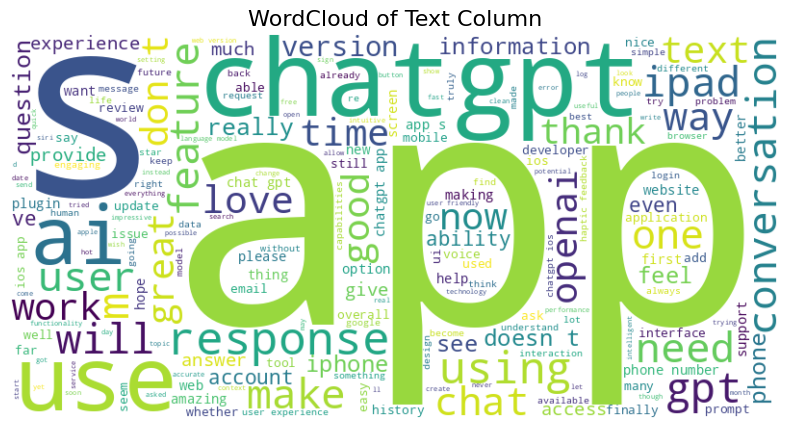

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Combine all text from the 'Text' column
text_data = ' '.join(df['Review'].dropna().astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes
plt.title("WordCloud of Text Column", fontsize=16)
plt.show()

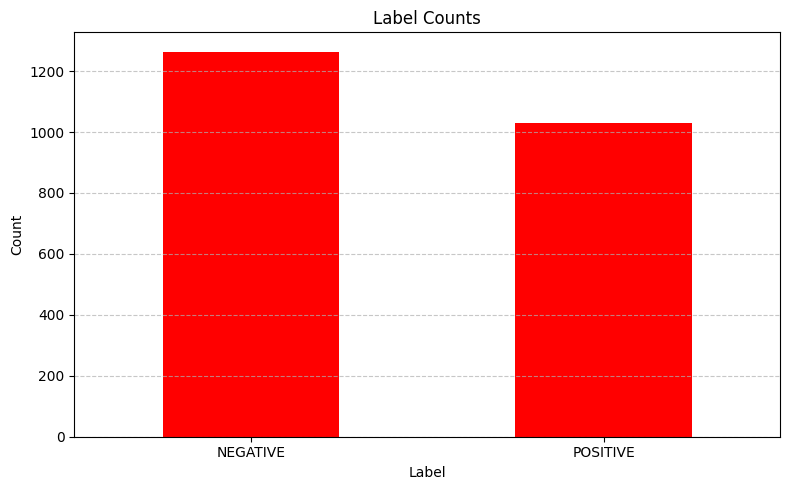

In [8]:
import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = df['Label'].value_counts()

# Plot the bar graph
plt.figure(figsize=(8, 5))
label_counts.plot(kind='bar', color='red')
plt.title('Label Counts')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [9]:
# Encode Labels
encoder = LabelEncoder()
df["Encoded_Label"] = encoder.fit_transform(df["Label"])
print("\n🔤 Encoded Labels (Negative=1, Postive=0):")
df


🔤 Encoded Labels (Negative=1, Postive=0):


,Review,Label,Encoded_Label
0,up to this point i ve mostly been using chatgp...,NEGATIVE,0
1,i ve been a user since it s initial roll out a...,NEGATIVE,0
2,this app would almost be perfect if it wasn t ...,NEGATIVE,0
3,i recently downloaded the app and overall it s...,POSITIVE,1
4,i appreciate the devs implementing siri suppor...,NEGATIVE,0
...,...,...,...
2287,this has to be a beginning to something crazy ...,NEGATIVE,0
2288,i ve been using chat and have been a proud pre...,POSITIVE,1
2289,the chatgpt ios app is an outstanding product ...,POSITIVE,1
2290,sam altman s blatant attempt at regulatory cap...,NEGATIVE,0


In [12]:
print(df.columns)


Index(['Review', 'Label', 'Encoded_Label'], dtype='object')


In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize Text
tokenizer = Tokenizer(num_words=None, oov_token="<OOV>")
tokenizer.fit_on_texts(df["Review"])

# i like nlp
# i hate someone very much

# i = 1, like = 2, nlp = 3, hate = 4, someone = 5, very = 6, much = 7

# [0, 0, 1, 2, 3]
# [1, 4, 5, 6, 7]

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df["Review"])
print("\n📜 Tokenized Sequences:\n", sequences)

# Pad sequences to have same length
max_length = max(len(seq) for seq in sequences)
X_padded = pad_sequences(sequences, maxlen=max_length, padding='post')
print("\n📦 Padded Sequences Shape:", X_padded.shape)
print("\n📦 Padded Sequences:\n", X_padded)


📜 Tokenized Sequences:
 [[54, 3, 11, 615, 4, 96, 1250, 71, 48, 17, 20, 16, 1384, 308, 48, 229, 2360, 156, 6, 14, 3283, 98, 1251, 1134, 9, 345, 724, 20, 2, 308, 751, 5, 18, 80, 27, 3, 25, 21, 834, 41, 3, 216, 51, 84, 178, 6, 4, 27, 2361, 1020, 1866, 3, 173, 29, 97, 11, 23, 337, 36, 835, 20, 15, 1252, 109, 2, 65, 944, 2, 55, 8, 345, 91, 1385, 53, 10, 338, 518, 2, 179, 203, 80, 274, 2362, 5, 649, 109, 3, 25, 752, 19, 1253, 2, 98, 1251, 689, 107, 55, 4, 1867, 2, 3284, 10, 11, 225, 4, 79, 309, 66, 39, 166, 2, 207, 785, 5, 1135, 3, 2, 690, 62, 10, 2, 308, 8, 4, 39, 27, 589, 11, 196, 451, 254, 23, 4, 27, 42, 7, 945, 650, 3285, 112, 399, 4, 1386, 16, 356, 1253, 1387, 3, 476, 1388, 17, 14, 144, 346, 15, 144, 9, 1868, 31, 4, 61, 1254, 2, 112, 318, 477, 10, 2, 144, 2363, 73, 1253, 1624, 1388, 2, 519, 753, 365, 103, 434, 22, 424, 328, 6, 39, 25, 59, 50, 18, 110, 113, 3286, 11, 2364, 31, 15, 6, 478, 22, 329, 1624, 2, 319, 461, 6, 129, 71, 946, 497, 2, 111, 279, 4, 226, 34, 9, 7, 145, 365, 435, 546

In [15]:
# Features and Labels
X =  X_padded
y = df['Encoded_Label'].values

#  Split Data
X_train, X_test, y_train, y_test, text_train, text_test = train_test_split(
    X, y, df["Review"], test_size=0.2, random_state=42)

print("\n📏 Shape After Split:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)


📏 Shape After Split:
X_train: (1833, 433) X_test: (459, 433)
y_train: (1833,) y_test: (459,)


In [16]:
#  Build ANN with Embedding Layer
vocab_size = len(tokenizer.word_index) + 1  # +1 for padding token
vocab_size

6063

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding, Flatten, Dense

#  Build ANN Model
# Parameters = (Number of inputs × Number of neurons) + Number of biases

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=16, input_length=max_length),
    Flatten(),  # Flattens 2D output to 1D
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

#  Compile ANN Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.build(input_shape=(None, max_length))
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 433, 16)        │        97,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6928)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │       110,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 207,889 (812.07 KB)

 Trainable params: 207,889 (812.07 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:

# 6️⃣ Train Model
history = model.fit(X_train, y_train, epochs=20, batch_size=4, validation_split=0.2)

# Total Data = 50
# Train = 40 (32 Training (batch size = 4 => total batchs = 8) and 8 for validation)
# Test = 10

Epoch 1/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5261 - loss: 0.6939 - val_accuracy: 0.5313 - val_loss: 0.6958
Epoch 2/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5835 - loss: 0.6783 - val_accuracy: 0.5368 - val_loss: 0.6916
Epoch 3/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5666 - loss: 0.6712 - val_accuracy: 0.5232 - val_loss: 0.7346
Epoch 4/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5993 - loss: 0.6642 - val_accuracy: 0.5259 - val_loss: 0.7152
Epoch 5/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6055 - loss: 0.6533 - val_accuracy: 0.5368 - val_loss: 0.7053
Epoch 6/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6265 - loss: 0.6295 - val_accuracy: 0.5150 - val_loss: 0.7104
Epoch 7/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6241 - loss: 0.6291 - val_accuracy: 0.6049 - val_loss: 0.6271
Epoch 8/20
367/367 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7960 - loss: 0.4249 - val_accuracy: 0.

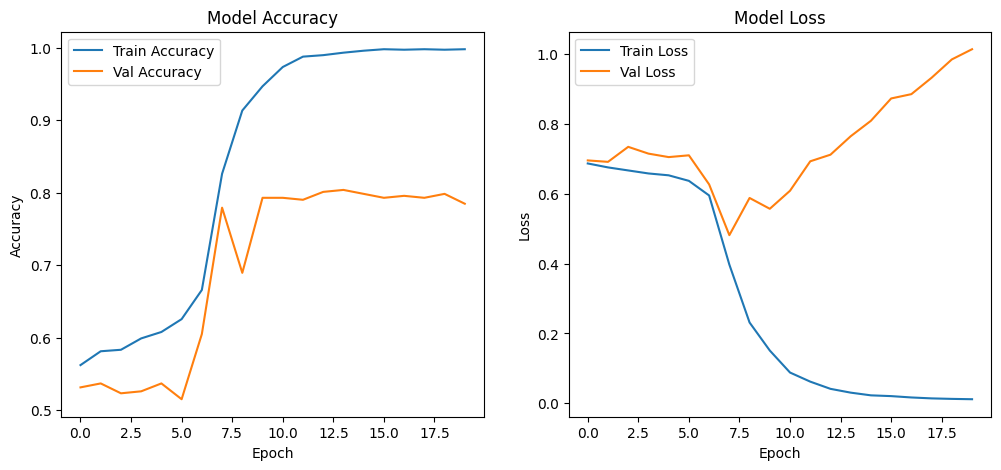

In [19]:
import matplotlib.pyplot as plt

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [20]:
# 7️⃣ Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {accuracy:.2f}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7627 - loss: 0.8613 

✅ Test Accuracy: 0.76


In [21]:
pred = model.predict(X_test)
pred

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


array([[4.01063735e-04],
       [4.39480580e-02],
       [9.98969615e-01],
       [6.77003991e-04],
       [1.55945418e-05],
       [2.19752942e-03],
       [8.36013436e-01],
       [4.18662373e-03],
       [6.56189286e-06],
       [9.99272287e-01],
       [9.94365931e-01],
       [7.20191360e-01],
       [2.01429334e-02],
       [9.99325335e-01],
       [2.82194611e-04],
       [7.05204729e-04],
       [1.28213093e-02],
       [4.45029058e-04],
       [7.57303648e-03],
       [9.96124864e-01],
       [1.92299917e-01],
       [9.98496354e-01],
       [3.63958534e-04],
       [4.21839271e-04],
       [3.95989104e-04],
       [1.49599509e-03],
       [9.99461293e-01],
       [3.13653462e-02],
       [6.72383816e-04],
       [5.20708382e-01],
       [1.39089678e-07],
       [8.36013496e-01],
       [9.95553255e-01],
       [2.77151576e-05],
       [7.08498284e-02],
       [9.99999166e-01],
       [9.73658979e-01],
       [9.77409422e-01],
       [5.02690533e-03],
       [8.36013436e-01],


In [22]:
# Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32").flatten()

# Map encoded labels back to original
y_test_labels = encoder.inverse_transform(y_test)
y_pred_labels = encoder.inverse_transform(y_pred)

# Get sequences and padded sequences for test set
test_sequences = tokenizer.texts_to_sequences(text_test)
test_padded_sequences = pad_sequences(test_sequences, maxlen=max_length, padding='post')

# Create DataFrame with all details
results_df = pd.DataFrame({
    "Text": text_test.values,
    "Tokenized Sequence": test_sequences,
    "Padded Sequence": list(test_padded_sequences),
    "Actual Label": y_test_labels,
    "Predicted Label": y_pred_labels
}).reset_index(drop=True)

print("\n📌 Results (Text | Tokenized Sequence | Padded Sequence | Actual | Predicted):")
results_df

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

📌 Results (Text | Tokenized Sequence | Padded Sequence | Actual | Predicted):


,Text,Tokenized Sequence,Padded Sequence,Actual Label,Predicted Label
0,this request is invalid,"[11, 293, 9, 687]","[11, 293, 9, 687, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",NEGATIVE,NEGATIVE
1,running smoothly on my phone,"[672, 1159, 20, 16, 46]","[672, 1159, 20, 16, 46, 0, 0, 0, 0, 0, 0, 0, 0...",POSITIVE,NEGATIVE
2,like it works well,"[34, 6, 134, 109]","[34, 6, 134, 109, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",POSITIVE,POSITIVE
3,as the title said,"[26, 2, 610, 474]","[26, 2, 610, 474, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",NEGATIVE,NEGATIVE
4,my chatgpt is not working it always shows this...,"[16, 17, 9, 28, 347, 6, 200, 569, 11, 293, 9, ...","[16, 17, 9, 28, 347, 6, 200, 569, 11, 293, 9, ...",NEGATIVE,NEGATIVE
...,...,...,...,...,...
454,lol so i d love to hear story that led to impl...,"[1110, 31, 4, 226, 67, 3, 1254, 646, 15, 2737,...","[1110, 31, 4, 226, 67, 3, 1254, 646, 15, 2737,...",NEGATIVE,POSITIVE
455,it was very entertaining using this app but wi...,"[6, 45, 60, 1645, 48, 11, 8, 23, 389, 318, 656...","[6, 45, 60, 1645, 48, 11, 8, 23, 389, 318, 656...",NEGATIVE,NEGATIVE
456,it says my personal phone number is a premium ...,"[6, 290, 16, 272, 46, 99, 9, 7, 625, 99, 5, 93...","[6, 290, 16, 272, 46, 99, 9, 7, 625, 99, 5, 93...",NEGATIVE,NEGATIVE
457,chinese can t use,"[783, 24, 22, 33]","[783, 24, 22, 33, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",NEGATIVE,NEGATIVE


In [23]:
from sklearn.metrics import classification_report, confusion_matrix
# 📊 Classification Report
print("\n📑 Classification Report:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))


📑 Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.76      0.82      0.79       251
    POSITIVE       0.76      0.70      0.73       208

    accuracy                           0.76       459
   macro avg       0.76      0.76      0.76       459
weighted avg       0.76      0.76      0.76       459




 Confusion Matrix:


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


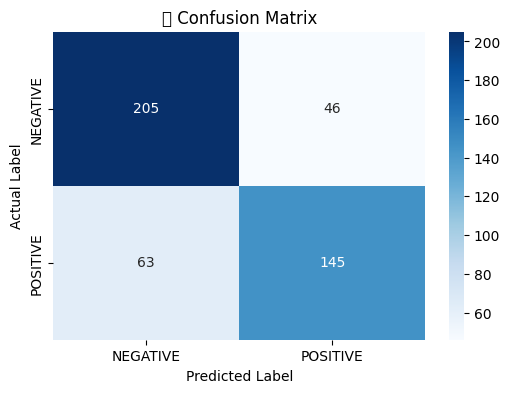

In [24]:
import seaborn as sns
# 📊 Confusion Matrix
print("\n Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)

# 🎨 Confusion Matrix (Visual)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("🔵 Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()